Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score,auc,roc_curve, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Bank Customer Churn Prediction.csv')
df.shape

(10000, 12)

In [ ]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

# Exploratory data analysis
Barplot analysis on Churn attribute

<Axes: xlabel='churn', ylabel='count'>

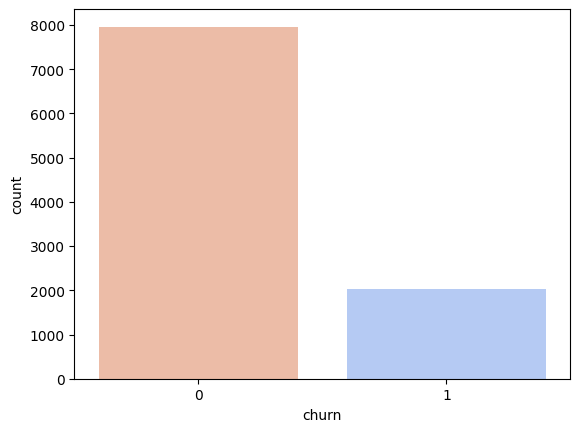

In [ ]:
import seaborn as sns
sns.countplot(x='churn',data=df,palette="coolwarm_r")

<Axes: xlabel='churn', ylabel='count'>

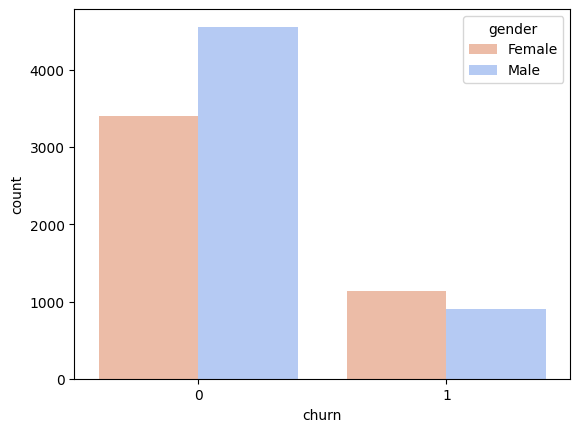

In [ ]:
sns.countplot(x='churn',data=df,hue='gender',palette="coolwarm_r")

<Axes: xlabel='churn', ylabel='count'>

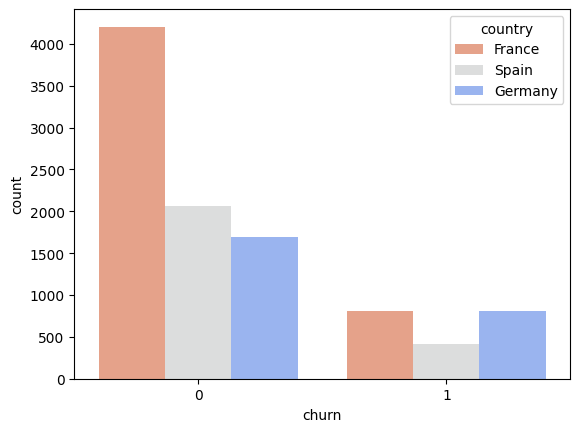

In [ ]:
sns.countplot(x='churn',data=df,hue='country',palette="coolwarm_r")

<Axes: xlabel='churn', ylabel='count'>

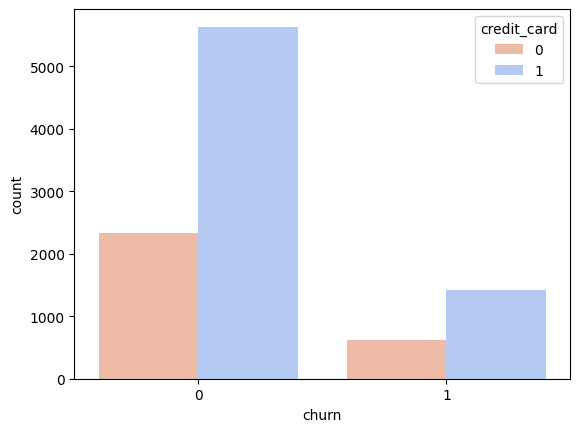

In [ ]:
sns.countplot(x='churn',data=df,hue='credit_card',palette="coolwarm_r")

<Axes: xlabel='churn', ylabel='count'>

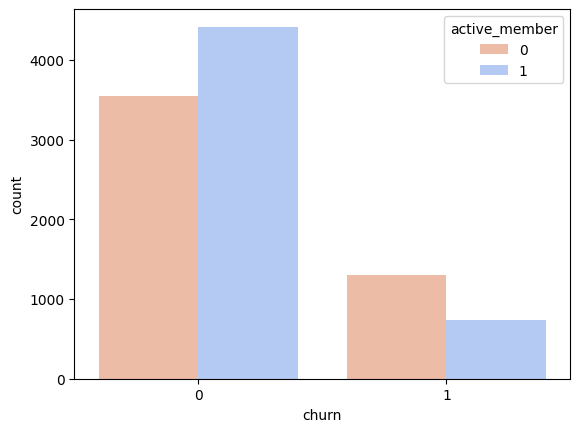

In [ ]:
sns.countplot(x='churn',data=df,hue='active_member',palette="coolwarm_r")

<Axes: xlabel='churn', ylabel='count'>

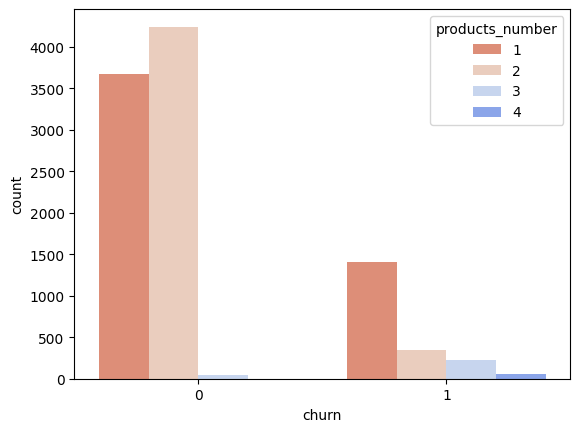

In [ ]:
sns.countplot(x='churn',data=df,hue='products_number',palette="coolwarm_r")

In [ ]:
#Drop the 'customer_id'
df=df.drop('customer_id',axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Histogram analysis

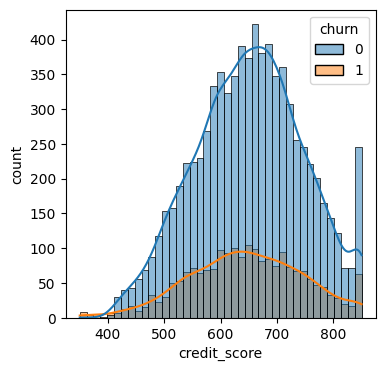

<Figure size 640x480 with 0 Axes>

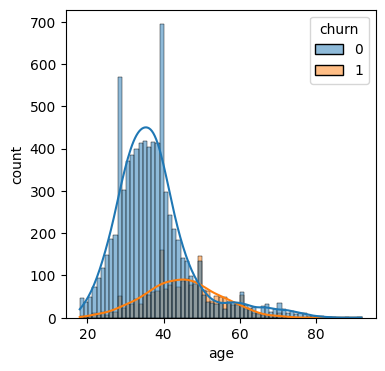

<Figure size 640x480 with 0 Axes>

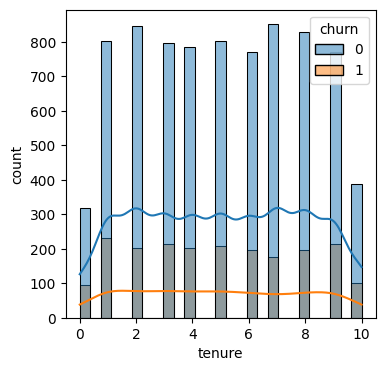

<Figure size 640x480 with 0 Axes>

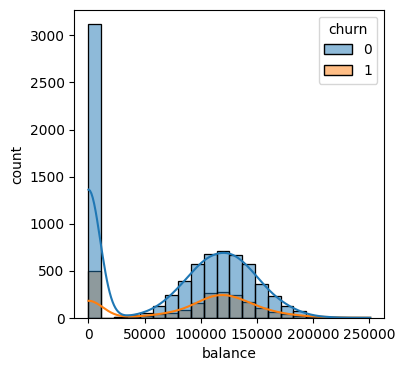

<Figure size 640x480 with 0 Axes>

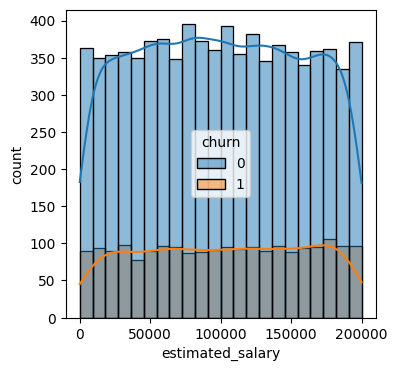

<Figure size 640x480 with 0 Axes>

In [ ]:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]) and col not in cat_var + ['churn']:
    plt.figure(figsize=(4,4))
    sns.histplot(df,x=df[col],kde=True,hue='churn')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    plt.tight_layout()

In [ ]:
numeric_cols = ['credit_score', 'age', 'tenure','products_number','credit_card','balance','estimated_salary']

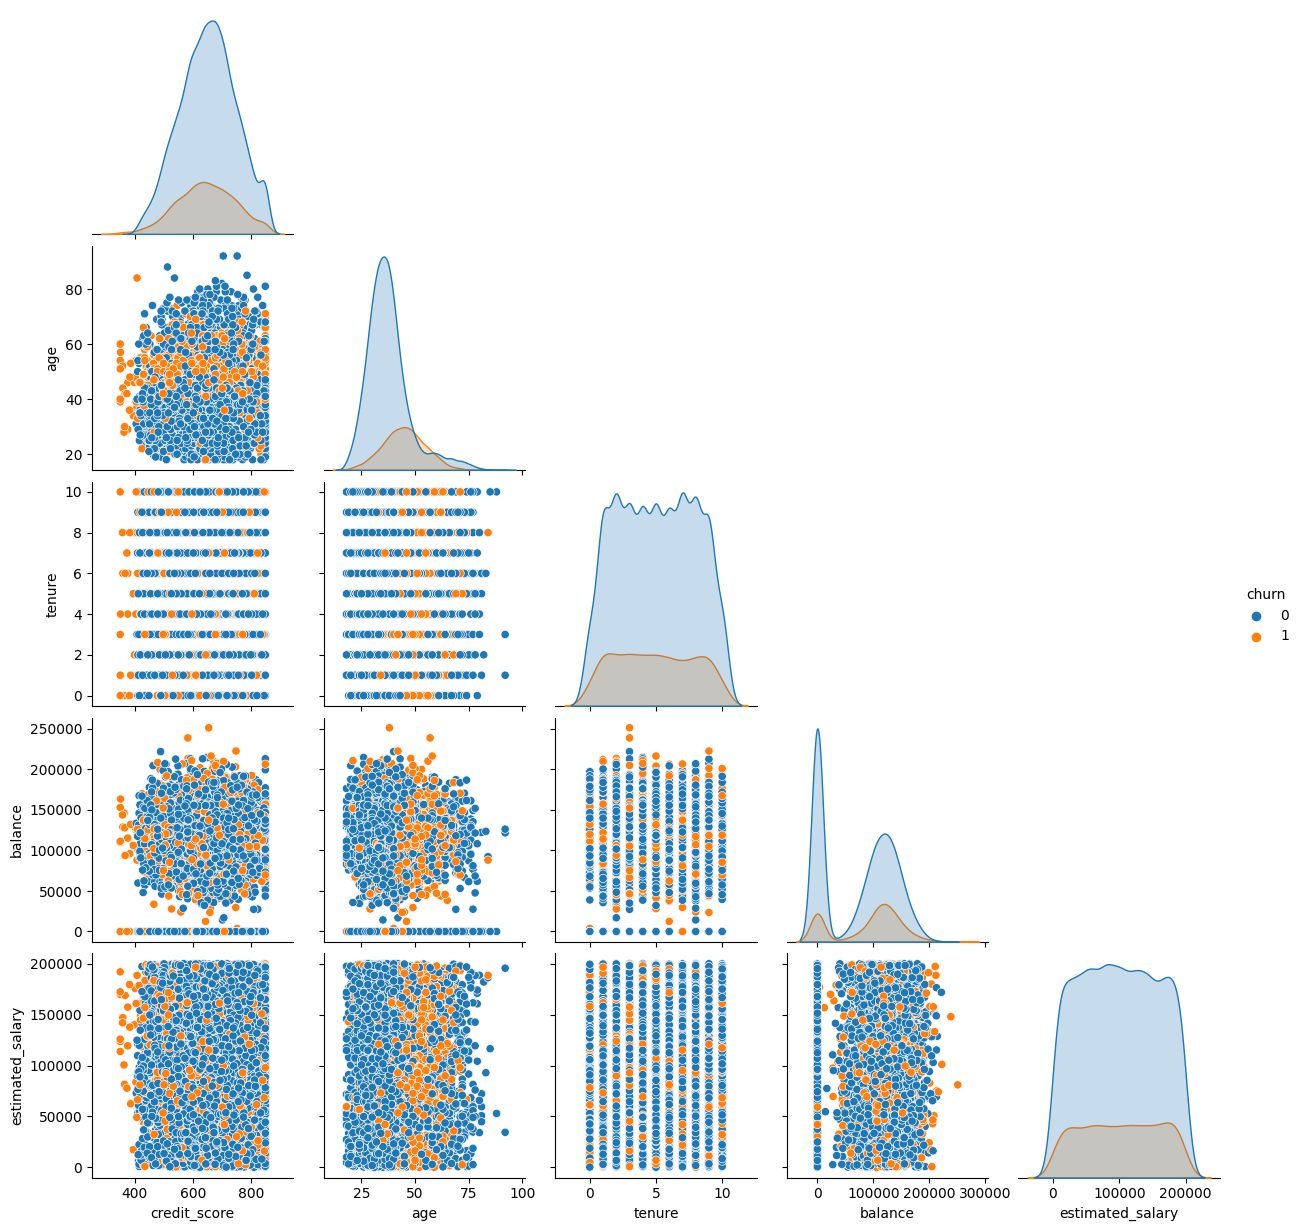

<Figure size 400000x160000 with 0 Axes>

In [ ]:
numeric_cols = ['credit_score', 'age', 'tenure','balance','estimated_salary']
#Target_variable = 'Churn'
df_num = df[numeric_cols + ['churn']]
sns.pairplot(df_num, hue='churn', corner=True)
plt.figure(figsize=(4000,1600))
plt.show()

<Axes: xlabel='estimated_salary', ylabel='credit_score'>

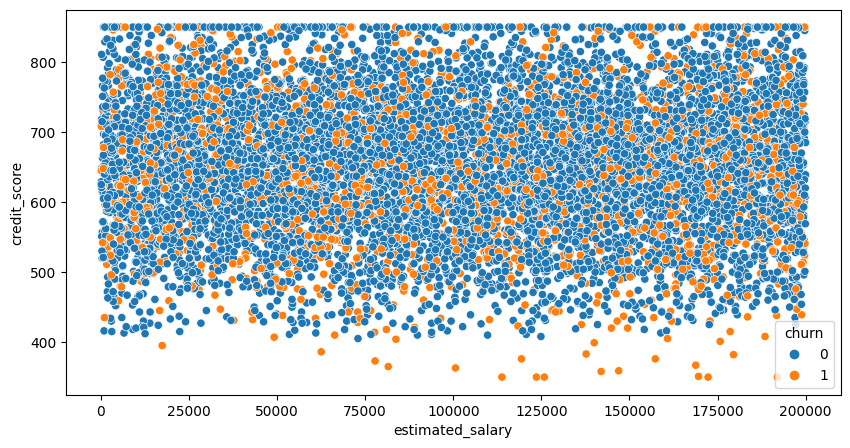

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='estimated_salary', y='credit_score', hue='churn')

<Axes: xlabel='age', ylabel='estimated_salary'>

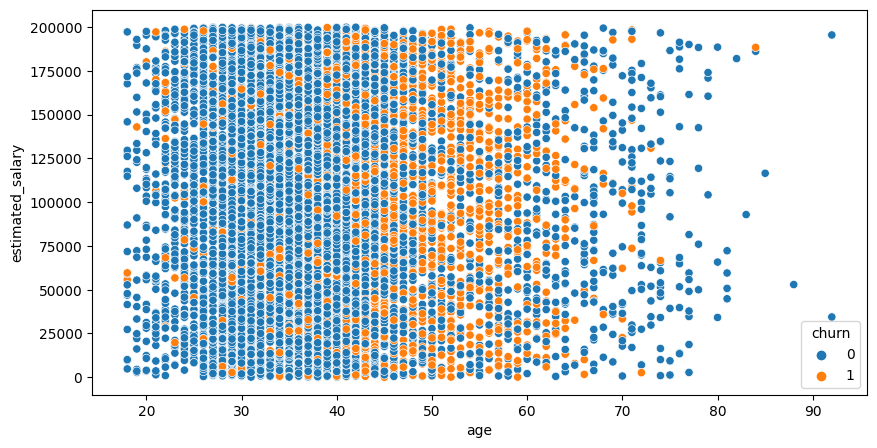

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='age', y='estimated_salary', hue='churn')

In [ ]:
# Categorical variables
cat_var=['country','gender','credit_card','active_member','products_number']

<ipython-input-52-c07d849c5314>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True,cmap = "GnBu")


<Axes: >

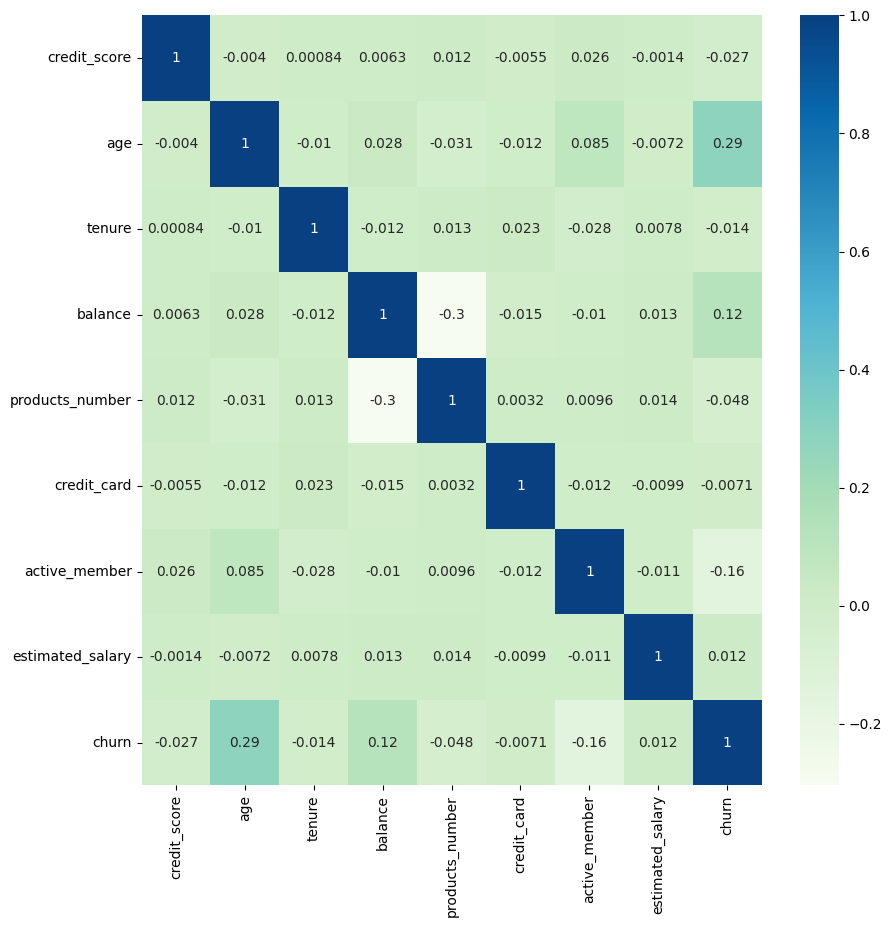

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True,cmap = "GnBu")

Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
#Convering Categorical Features into numerical features using LabelEncoder
df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [ ]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Separating the target variable

In [ ]:
X=df.drop('churn',axis=1)
y=df['churn']

Balancing the churn label

In [ ]:
X_bal,Y_bal=SMOTE().fit_resample(X,y)
Y_bal.value_counts()

1    7963
0    7963
Name: churn, dtype: int64

Splitting the data for train and test set

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_bal,Y_bal,test_size=0.3,random_state=42)

Scalling the data

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print("X_bal shape : ", X_bal.shape)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("Y_bal shape : ", Y_bal.shape)
print("Y_train shape : ", Y_train.shape)
print("Y_test shape : ", Y_test.shape)

X_bal shape :  (15926, 10)
X_train shape :  (11148, 10)
X_test shape :  (4778, 10)
Y_bal shape :  (15926,)
Y_train shape :  (11148,)
Y_test shape :  (4778,)


Defining the logistic regression model and Hyper parameter tunning using GridsearchCV

In [ ]:
classifier=LogisticRegression()
parameter={'penalty':['l1','l2','elaticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}
cls_reg=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [ ]:
cls_reg.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elaticnet']},
             scoring='accuracy')

Obtaining the best parameters

In [ ]:
print(cls_reg.best_params_)

{'C': 30, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(cls_reg.best_score_)

0.7726926148788795


In [ ]:
#Prediction
Y_pred=cls_reg.predict(X_test)

Accuracy of the model

In [ ]:
score=accuracy_score(Y_pred,Y_test)
print(score)

0.7785684386772709


Classification report

In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2326
           1       0.80      0.76      0.78      2452

    accuracy                           0.78      4778
   macro avg       0.78      0.78      0.78      4778
weighted avg       0.78      0.78      0.78      4778



Confusion matrix

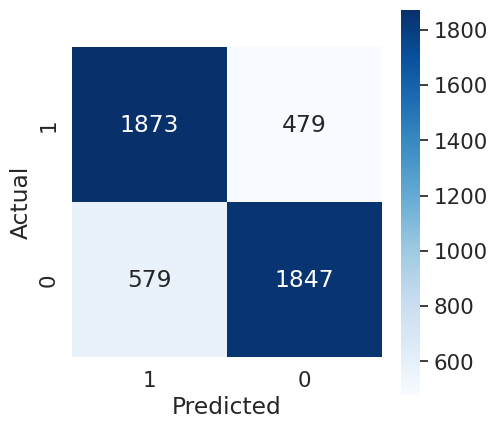

In [ ]:
logreg_conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize = (5,5))
sns.set(font_scale=1.4)
ax = sns.heatmap(logreg_conf_matrix, cmap='Blues',annot=True, fmt='d', square=True)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.invert_yaxis()
ax.invert_xaxis()

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/ColabNotebooks/CustomerChurnPrediction.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/CustomerChurnPrediction.ipynb to html
[NbConvertApp] Writing 3081218 bytes to /content/drive/MyDrive/ColabNotebooks/CustomerChurnPrediction.html
